# **CHECKPOINT 4:** MAXIMUM LIKELIHOOD FITTING 

## S1867522

In [1]:
# libraries used
import numpy as np
import matplotlib.pyplot as plt
import math
from iminuit import Minuit

## **PART 1**

In this part I first plot the histogram of the given data, then I calculate the maximum likelihood fit of the data to obtain the lifetime and its error. This is done firstly with the default way (integrating over the whole range of [0, inf]) and the I do it by normalizing the PDF over the range of the data (ie. [0,10]).

In [2]:
# load data into a numpy array 
data = np.loadtxt("datafile-exp.txt")

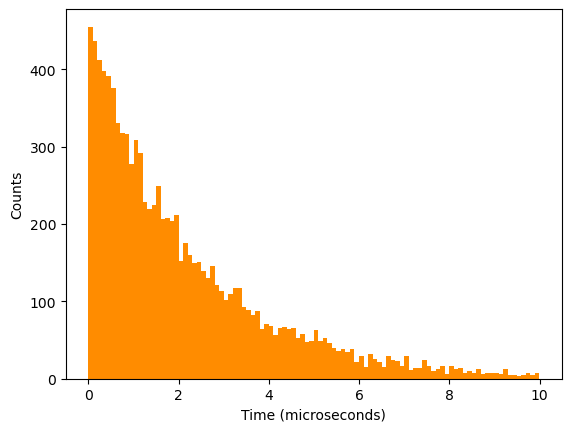

In [3]:
# plot histogram
plt.hist(data, bins = 100, color = "darkorange")
plt.xlabel("Time (microseconds)")
plt.ylabel("Counts")
plt.show;

## Minimisation for range [0,inf] 
### (default with Minuit)

In [4]:
# Define PDF function for an exponential decay 

def pdf_func(x, lifetime):
   
    return (1/lifetime)*np.exp(-x/lifetime)

In [5]:
# Define the negative of the log of the joint likelihood

def NLL_func(lifetime):

    return -1*np.sum(np.log(pdf_func(data, lifetime)))

In [6]:
# Estimate best value of lifetime by minimising NLL using Minuit

m = Minuit(NLL_func, lifetime = 2.2)

m.migrad()  # run optimiser
m.hesse()   # run covariance estimator

print(m.values)  # print estimated values
print(m.errors)  # print error of the estimated values

<ValueView lifetime=2.096073738281763>
<ErrorView lifetime=0.029642920349155985>


## Minimisation for range [0,10]
### Normalizing the PDF manually over an especific range

In [7]:
# Define PDF function for an exponential decay (normlaized)

def pdf_func_norm(x, lifetime, a, b):
     
     return (1/lifetime)*np.exp(-x/lifetime) / (np.exp(-a/lifetime) - np.exp(-b/lifetime) )
    

In [8]:
# Define the negative of the log of the joint likelihood for the normalized function

def NLL_func_norm(lifetime):
    # parameters for the range 0 and 10
    return -1*np.sum(np.log(pdf_func_norm(data, lifetime, 0, 10)))

In [9]:
# Estimate best value of lifetime by minimising NLL using Minuit

m_norm = Minuit(NLL_func_norm, lifetime = 2.2)

m_norm.migrad()  # run optimiser
m_norm.hesse()   # run covariance estimator

print(m_norm.values)  # print estimated values
print(m_norm.errors)  # print error of the estimated values

<ValueView lifetime=2.2043268588893827>
<ErrorView lifetime=0.03541593189633051>


### The values for the estimated lifetime after the maximum likelihood fit are slightly different (over range [0,inf] lifetime = ~2.10, over range [0,10] lifetime = ~2.20). These values are going to be different as in the case integrating over infinite we are taking into account a tail that should go to infinite, whereas in the second calculation we cut the tail in the given range (having "less data").

## **PART 2**

For this part I followed the same procedure as for Part 1 (with especified range). First I plotted the data, then I defined the normalized PDF function over a range (in this case it's made up of the combination of two functions, and exponetial decay and a Gaussian). I calculated the NLL (negative of the log of the joint likelihood) for the function and then I minimise it by using Minuit. The parameters we want to estimate are the lifetime, the eman of the Gaussian, and the fraction of the combination of the two functions (exponential anf Gaussian).

In [10]:
# load data into a numpy array 
data2 = np.loadtxt("datafile-expresonance.txt")

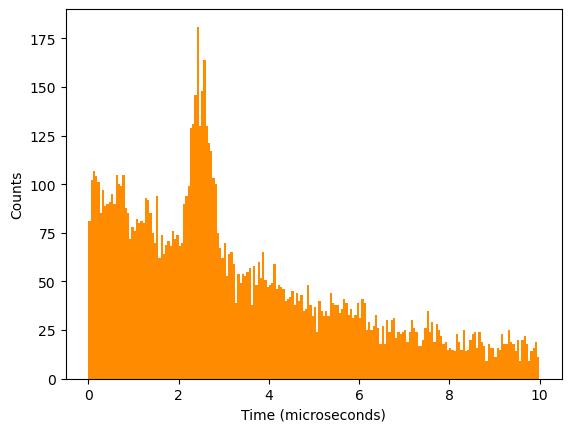

In [11]:
# plot histogram
plt.hist(data2, bins = 200, color = "darkorange")
plt.xlabel("Time (microseconds)")
plt.ylabel("Counts")
plt.show;

In [12]:
# Define the normalized over a given range combined PDF function
# exponential decay + gaussian distirbution

def pdf_comb (x, F, lifetime, mu):

    # given Gaussian width
    sigma = 0.2

    # range [0,10]
    a = 0
    b = 10

    return F*((1/lifetime)*np.exp(-x/lifetime) / (np.exp(-a/lifetime) - np.exp(-b/lifetime) )) + (1-F)* ( (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))  )

In [13]:
# Define the negative of the log of the joint likelihood for the normalized function

def NLL_func_comb(F, lifetime, mu):

    return -np.sum(np.log(pdf_comb(data2, F, lifetime, mu)))

In [14]:
# Estimate best value of lifetime by minimising NLL using Minuit

m_comb = Minuit(NLL_func_comb, F = 0.9, lifetime = 2.2, mu = 2.5)

m_comb.migrad()  # run optimiser
m_comb.hesse()   # run covariance estimator

print(m_comb.values)  # print estimated values
print(m_comb.errors)  # print error of the estimated values

<ValueView F=0.9028523764104412 lifetime=5.042590649091298 mu=2.4997166475862467>
<ErrorView F=0.0063732727372126175 lifetime=0.14516293240930184 mu=0.016667781071892467>


The values for the parameters "lifetime", "mu", and "F" are determined with their correnspondent error after the minimisation with Minuit.

### **END OF NOTEBOOK**